<a href="https://colab.research.google.com/github/zeeshubanny/EDA-HOTEL-BOOKING/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

### For this EDA project, I will use the topic “Hotel booking” and given data.

This data set varies the booking information for a city hotel and a resort hotel, and also it contains information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. 

##lets discuss about what i am doing in this dataset.



Types of visitors? (No. of adults, children, babies)
Repeated guests.

*   **What type of hotel has more bookings?** (city hotel or resort hotel)
*  **Which are the most busy months?**
*  **Cancellation rates in the two types of hotels.**
*  **Types of visitors? (No. of adults, children, babies)**
*  **Repeated guests.**


#Data Preparation and Cleaning

##The first step is to import the main libraries that we will use for this project.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

##storing the data in dataframe.
Now, we download the dataset to use it as a pandas dataframe.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
hotel_data = pd.read_csv('/content/drive/MyDrive/CAPSTONE PROJECT/Hotel Bookings.csv')

In [5]:
hotel_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


Now We check how many rows & columns has the hotel_data

In [6]:
hotel_data.shape

(119390, 32)

###Excellent! now we know that our dataset has 119390 rows.

Now lets check how many cells are missing from our dataset.

In [7]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##Lets check irt out in short description...

In [8]:
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

##We can see that we have four columns with missing values. Lets check these values in form of percentile

In [9]:
hotel_data.isnull().sum()/len(hotel_data.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

So  now we are sure about The columns **“agent”** and **“company”** have a high percentage of missing values. As these columns won’t be relevant for our analysis, we can delete them.
###**for making our work easy lets clean up the data.**

In [10]:
# deleting company and agent columns
hotel_data=hotel_data.drop(['agent','company'], axis=1)

The columns **“children”** and **“country”** have a low percentage of missing values. We will **remove** the full row on missing cells.


In [11]:
 # deleting  rows with empty cells
 hotel_data = hotel_data.dropna(axis = 0)

In our Analysis we do not required  **days_in_waiting_list** 

say it **bye bye!**

In [12]:
 #  deleting days_in_waiting_list column
 hotel_data = hotel_data.drop(labels='days_in_waiting_list', axis=1)

Lets check again the missing values. are they gone or just peaking again.

also check the no of columns

In [13]:
hotel_data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

Done with the missing values.

In [14]:
hotel_data.shape

(118898, 29)

should i change arrival_date_year to be categorical?
lets do it

In [15]:
hotel_data['arrival_date_year'] = hotel_data['arrival_date_year'].apply(lambda x: str(x))

###**1. What type of hotel has more bookings?**

In [16]:
# exploring the pie chart
plt.rcParams['figure.figsize'] = 8,8

# assigning labels and converting them to list 
labels = hotel_data['hotel'].value_counts().index.tolist()

# assigning magnitude and converting to list
sizes = hotel_data['hotel'].value_counts().tolist()

# assigning pie chart color
colors = ["darkorange","lightskyblue"]

([<matplotlib.patches.Wedge at 0x7ff2693c7690>,
 [Text(-0.9520945954321745, -0.5509227544300964, 'City Hotel'),
  Text(0.9520945438510592, 0.5509228435716237, 'Resort Hotel')],
 [Text(-0.519324324781186, -0.30050332059823437, '66.7%'),
  Text(0.5193242966460322, 0.3005033692208856, '33.3%')])

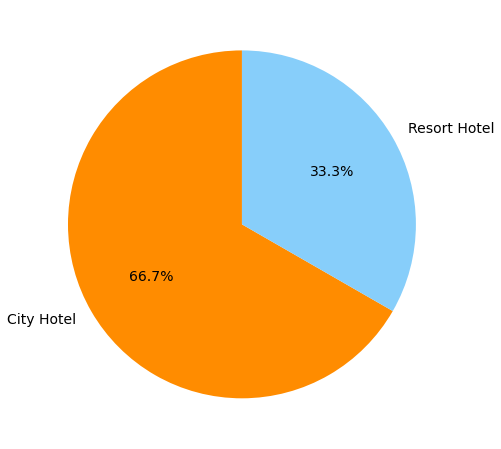

In [17]:
# creating pie chart
# autopct enables you to display the percent value using Python string formatting. .1f% will round off to the tenth place.
# startangle will allow the percentage to rotate counter-clockwise. Lets say we have 4 portions: 10%, 30%, 20% and 40%. The pie will rotate from smallest to the biggest (counter clockwise). 10% -> 20% -> 30% -> 40%
# We have only 2 sections so anglestart does not matter
# textprops will adjust the size of text
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})

 majority of the bookings were made in city hotels. This could be because city hotels tend to be cheaper, everything is more accessible and more suitable for individuals or small groups of visitors.

##**2. Which are the most busy months?**

Text(0, 0.5, 'Count')

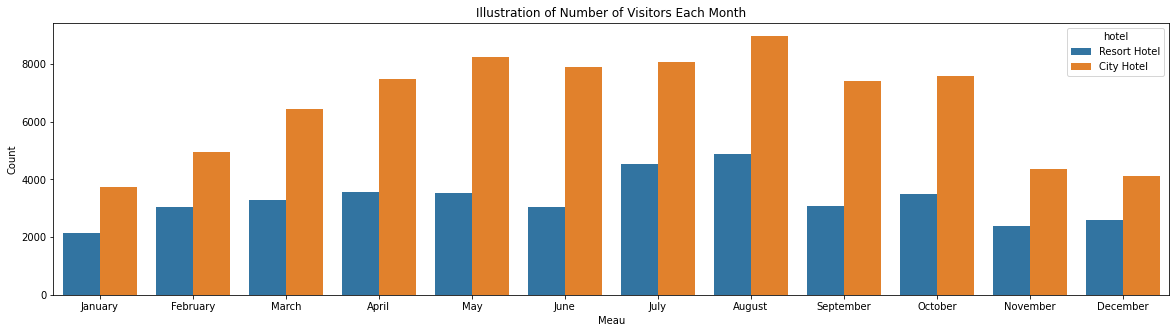

In [20]:
# We can simply use a countplot as we sre visualising categorical data
plt.figure(figsize=(20,5))

# data we will use in a list
l1 = ['hotel','arrival_date_month']

# plotting
sns.countplot(data = hotel_data[l1],x= "arrival_date_month",hue="hotel",order=["January","February","March","April","May","June",
                                                                              "July","August","September","October","November","December"]).set_title(
'Illustration of Number of Visitors Each Month')
plt.xlabel('')
plt.ylabel('Count')

From our visualisation, we can deduce that August is the busiest month for both City hotels and Resort hotels whereas bookings are lowest during January for both types of hotels. This could be because of weather conditions as people prefer going for vacation during more comfortable seasons such as Spring/Summer and not during Winter.

##**3. Cancellation rates in the two types of hotels.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Bookings Cancelled')

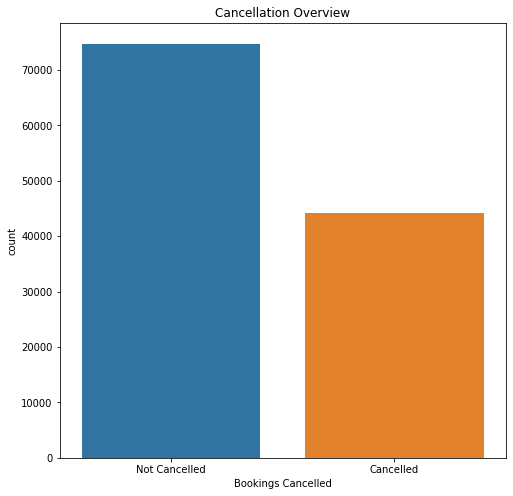

In [19]:
# First we will check proportion of bookings that were cancelled

# Replacing the 1s and 0s in the is_cancelled column to cancelled and not cancelled. 
hotel_data['is_canceled'] = hotel_data.is_canceled.replace([1,0],["Cancelled","Not Cancelled"])
cancelled_data = hotel_data['is_canceled']

# Plotting a countplot
sns.countplot(cancelled_data).set_title("Cancellation Overview")
plt.xlabel("Bookings Cancelled")
plt.ylabel('averages')